In [49]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
url = "data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]
df['mkt_cap'] /= df['mkt_cap'].max()
df['tran_value'] /= df['tran_value'].max()
df['prev_tran_num'] /= df['prev_tran_num'].max()
df['return_t5'] = np.log(1 + df['return_t5'])
df['return_t30'] = np.log(1 + df['return_t30'])
df['vol_sh_out_pct'] = np.log(1 + df['vol_sh_out_pct'])
df['tran_value'] = np.log(1 + df['tran_value'])
df['mkt_cap'] = np.log(1 + df['mkt_cap'])

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
y_train_5d

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [41]:
X_train

array([[-1.        , -0.0661398 , -0.08338161, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -0.14156356, -0.14618251, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.17793121, -0.23445731, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.        , -0.14041215, -0.02224561, ...,  0.333     ,
         0.        ,  0.        ],
       [ 1.        , -0.11878354, -0.08883121, ...,  0.522     ,
         0.761     ,  0.935     ],
       [ 1.        , -0.08664781, -0.04919024, ...,  0.534     ,
         0.46      ,  0.548     ]])

In [42]:
X_train.shape

(34481, 11)

In [43]:
X_test.shape

(17240, 11)

In [44]:
# create model
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [45]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [46]:
# Fit the model
history = model.fit(
    X_train, y_train_5d, epochs=1000, batch_size=128,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.7006 - acc: 0.5086 - val_loss: 0.6917 - val_acc: 0.5321
Epoch 2/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6894 - acc: 0.5459 - val_loss: 0.6911 - val_acc: 0.5368
Epoch 3/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6874 - acc: 0.5500 - val_loss: 0.6902 - val_acc: 0.5384
Epoch 4/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6860 - acc: 0.5539 - val_loss: 0.6896 - val_acc: 0.5407
Epoch 5/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6850 - acc: 0.5571 - val_loss: 0.6893 - val_acc: 0.5404
Epoch 6/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6841 - acc: 0.5578 - val_loss: 0.6886 - val_acc: 0.5476
Epoch 7/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5581 - val_loss: 0.6884 - 

27584/27584 [==============================] - 0s 11us/step - loss: 0.6764 - acc: 0.5769 - val_loss: 0.6835 - val_acc: 0.5550
Epoch 60/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6764 - acc: 0.5750 - val_loss: 0.6836 - val_acc: 0.5534
Epoch 61/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6763 - acc: 0.5748 - val_loss: 0.6837 - val_acc: 0.5533
Epoch 62/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6763 - acc: 0.5750 - val_loss: 0.6836 - val_acc: 0.5530
Epoch 63/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6763 - acc: 0.5753 - val_loss: 0.6835 - val_acc: 0.5544
Epoch 64/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6762 - acc: 0.5754 - val_loss: 0.6838 - val_acc: 0.5544
Epoch 65/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6762 - acc: 0.5758 - val_loss: 0.6838 - val_acc: 0.5547
Epoch 66/1000
27584/27584 [==========

27584/27584 [==============================] - 0s 10us/step - loss: 0.6748 - acc: 0.5750 - val_loss: 0.6835 - val_acc: 0.5571
Epoch 118/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6748 - acc: 0.5765 - val_loss: 0.6832 - val_acc: 0.5576
Epoch 119/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6748 - acc: 0.5752 - val_loss: 0.6834 - val_acc: 0.5575
Epoch 120/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6748 - acc: 0.5766 - val_loss: 0.6832 - val_acc: 0.5571
Epoch 121/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6747 - acc: 0.5761 - val_loss: 0.6833 - val_acc: 0.5571
Epoch 122/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6748 - acc: 0.5763 - val_loss: 0.6833 - val_acc: 0.5572
Epoch 123/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6747 - acc: 0.5758 - val_loss: 0.6833 - val_acc: 0.5573
Epoch 124/1000
27584/27584 [=====

27584/27584 [==============================] - 0s 9us/step - loss: 0.6738 - acc: 0.5784 - val_loss: 0.6835 - val_acc: 0.5589
Epoch 176/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6738 - acc: 0.5789 - val_loss: 0.6834 - val_acc: 0.5589
Epoch 177/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6738 - acc: 0.5786 - val_loss: 0.6836 - val_acc: 0.5584
Epoch 178/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6738 - acc: 0.5792 - val_loss: 0.6833 - val_acc: 0.5598
Epoch 179/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6738 - acc: 0.5785 - val_loss: 0.6835 - val_acc: 0.5591
Epoch 180/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6738 - acc: 0.5788 - val_loss: 0.6833 - val_acc: 0.5601
Epoch 181/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6737 - acc: 0.5789 - val_loss: 0.6836 - val_acc: 0.5586
Epoch 182/1000
27584/27584 [=

27584/27584 [==============================] - 0s 10us/step - loss: 0.6732 - acc: 0.5798 - val_loss: 0.6839 - val_acc: 0.5560
Epoch 234/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6732 - acc: 0.5793 - val_loss: 0.6836 - val_acc: 0.5565
Epoch 235/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6732 - acc: 0.5797 - val_loss: 0.6837 - val_acc: 0.5565
Epoch 236/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6732 - acc: 0.5796 - val_loss: 0.6837 - val_acc: 0.5563
Epoch 237/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6732 - acc: 0.5791 - val_loss: 0.6837 - val_acc: 0.5569
Epoch 238/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6732 - acc: 0.5790 - val_loss: 0.6837 - val_acc: 0.5563
Epoch 239/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6732 - acc: 0.5791 - val_loss: 0.6837 - val_acc: 0.5569
Epoch 240/1000
27584/27584 [====

27584/27584 [==============================] - 0s 9us/step - loss: 0.6727 - acc: 0.5802 - val_loss: 0.6838 - val_acc: 0.5563
Epoch 292/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6727 - acc: 0.5798 - val_loss: 0.6836 - val_acc: 0.5565
Epoch 293/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6727 - acc: 0.5805 - val_loss: 0.6837 - val_acc: 0.5560
Epoch 294/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6727 - acc: 0.5801 - val_loss: 0.6838 - val_acc: 0.5557
Epoch 295/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6726 - acc: 0.5803 - val_loss: 0.6839 - val_acc: 0.5562
Epoch 296/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6726 - acc: 0.5799 - val_loss: 0.6838 - val_acc: 0.5547
Epoch 297/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6726 - acc: 0.5804 - val_loss: 0.6837 - val_acc: 0.5566
Epoch 298/1000
27584/27584 [======

27584/27584 [==============================] - 0s 9us/step - loss: 0.6722 - acc: 0.5814 - val_loss: 0.6840 - val_acc: 0.5584
Epoch 350/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6722 - acc: 0.5802 - val_loss: 0.6838 - val_acc: 0.5588
Epoch 351/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6722 - acc: 0.5803 - val_loss: 0.6838 - val_acc: 0.5594
Epoch 352/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6722 - acc: 0.5805 - val_loss: 0.6839 - val_acc: 0.5575
Epoch 353/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6721 - acc: 0.5812 - val_loss: 0.6837 - val_acc: 0.5595
Epoch 354/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6721 - acc: 0.5808 - val_loss: 0.6838 - val_acc: 0.5576
Epoch 355/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6721 - acc: 0.5816 - val_loss: 0.6842 - val_acc: 0.5586
Epoch 356/1000
27584/27584 [====

27584/27584 [==============================] - 0s 9us/step - loss: 0.6718 - acc: 0.5812 - val_loss: 0.6837 - val_acc: 0.5605
Epoch 408/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6718 - acc: 0.5813 - val_loss: 0.6838 - val_acc: 0.5585
Epoch 409/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6718 - acc: 0.5802 - val_loss: 0.6841 - val_acc: 0.5569
Epoch 410/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6718 - acc: 0.5812 - val_loss: 0.6839 - val_acc: 0.5565
Epoch 411/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6717 - acc: 0.5812 - val_loss: 0.6844 - val_acc: 0.5560
Epoch 412/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6718 - acc: 0.5812 - val_loss: 0.6839 - val_acc: 0.5556
Epoch 413/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6717 - acc: 0.5808 - val_loss: 0.6838 - val_acc: 0.5595
Epoch 414/1000
27584/27584 [=====

27584/27584 [==============================] - 0s 9us/step - loss: 0.6713 - acc: 0.5817 - val_loss: 0.6844 - val_acc: 0.5565
Epoch 466/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6714 - acc: 0.5824 - val_loss: 0.6837 - val_acc: 0.5592
Epoch 467/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6714 - acc: 0.5812 - val_loss: 0.6840 - val_acc: 0.5563
Epoch 468/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6714 - acc: 0.5815 - val_loss: 0.6842 - val_acc: 0.5555
Epoch 469/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6714 - acc: 0.5827 - val_loss: 0.6838 - val_acc: 0.5576
Epoch 470/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6714 - acc: 0.5818 - val_loss: 0.6838 - val_acc: 0.5591
Epoch 471/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6714 - acc: 0.5824 - val_loss: 0.6839 - val_acc: 0.5562
Epoch 472/1000
27584/27584 [=====

27584/27584 [==============================] - 0s 9us/step - loss: 0.6711 - acc: 0.5823 - val_loss: 0.6842 - val_acc: 0.5575
Epoch 524/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6711 - acc: 0.5820 - val_loss: 0.6838 - val_acc: 0.5604
Epoch 525/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6712 - acc: 0.5831 - val_loss: 0.6839 - val_acc: 0.5573
Epoch 526/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6711 - acc: 0.5819 - val_loss: 0.6840 - val_acc: 0.5566
Epoch 527/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6711 - acc: 0.5833 - val_loss: 0.6839 - val_acc: 0.5573
Epoch 528/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6711 - acc: 0.5823 - val_loss: 0.6837 - val_acc: 0.5588
Epoch 529/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6711 - acc: 0.5828 - val_loss: 0.6837 - val_acc: 0.5589
Epoch 530/1000
27584/27584 [===

27584/27584 [==============================] - 0s 10us/step - loss: 0.6708 - acc: 0.5828 - val_loss: 0.6838 - val_acc: 0.5649
Epoch 582/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6708 - acc: 0.5835 - val_loss: 0.6840 - val_acc: 0.5586
Epoch 583/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6708 - acc: 0.5833 - val_loss: 0.6841 - val_acc: 0.5565
Epoch 584/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6708 - acc: 0.5835 - val_loss: 0.6838 - val_acc: 0.5618
Epoch 585/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6707 - acc: 0.5838 - val_loss: 0.6837 - val_acc: 0.5649
Epoch 586/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6708 - acc: 0.5833 - val_loss: 0.6839 - val_acc: 0.5607
Epoch 587/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6708 - acc: 0.5831 - val_loss: 0.6839 - val_acc: 0.5610
Epoch 588/1000
27584/27584 [===

27584/27584 [==============================] - 0s 8us/step - loss: 0.6704 - acc: 0.5854 - val_loss: 0.6837 - val_acc: 0.5592
Epoch 640/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6704 - acc: 0.5841 - val_loss: 0.6838 - val_acc: 0.5582
Epoch 641/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6704 - acc: 0.5849 - val_loss: 0.6837 - val_acc: 0.5585
Epoch 642/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6704 - acc: 0.5850 - val_loss: 0.6841 - val_acc: 0.5594
Epoch 643/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6704 - acc: 0.5850 - val_loss: 0.6839 - val_acc: 0.5584
Epoch 644/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6704 - acc: 0.5854 - val_loss: 0.6839 - val_acc: 0.5586
Epoch 645/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6704 - acc: 0.5844 - val_loss: 0.6837 - val_acc: 0.5611
Epoch 646/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6701 - acc: 0.5855 - val_loss: 0.6837 - val_acc: 0.5618
Epoch 698/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6700 - acc: 0.5841 - val_loss: 0.6840 - val_acc: 0.5591
Epoch 699/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6701 - acc: 0.5852 - val_loss: 0.6837 - val_acc: 0.5600
Epoch 700/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6700 - acc: 0.5847 - val_loss: 0.6836 - val_acc: 0.5662
Epoch 701/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6701 - acc: 0.5853 - val_loss: 0.6839 - val_acc: 0.5604
Epoch 702/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6700 - acc: 0.5867 - val_loss: 0.6839 - val_acc: 0.5601
Epoch 703/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6700 - acc: 0.5862 - val_loss: 0.6838 - val_acc: 0.5589
Epoch 704/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6698 - acc: 0.5858 - val_loss: 0.6838 - val_acc: 0.5660
Epoch 756/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6698 - acc: 0.5858 - val_loss: 0.6838 - val_acc: 0.5666
Epoch 757/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6697 - acc: 0.5869 - val_loss: 0.6840 - val_acc: 0.5624
Epoch 758/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6698 - acc: 0.5857 - val_loss: 0.6839 - val_acc: 0.5652
Epoch 759/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6698 - acc: 0.5862 - val_loss: 0.6839 - val_acc: 0.5676
Epoch 760/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6697 - acc: 0.5870 - val_loss: 0.6840 - val_acc: 0.5604
Epoch 761/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6697 - acc: 0.5869 - val_loss: 0.6844 - val_acc: 0.5630
Epoch 762/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6695 - acc: 0.5870 - val_loss: 0.6840 - val_acc: 0.5701
Epoch 814/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6695 - acc: 0.5866 - val_loss: 0.6842 - val_acc: 0.5662
Epoch 815/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6694 - acc: 0.5885 - val_loss: 0.6844 - val_acc: 0.5630
Epoch 816/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6695 - acc: 0.5867 - val_loss: 0.6839 - val_acc: 0.5691
Epoch 817/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6695 - acc: 0.5880 - val_loss: 0.6840 - val_acc: 0.5679
Epoch 818/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6695 - acc: 0.5878 - val_loss: 0.6839 - val_acc: 0.5681
Epoch 819/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6695 - acc: 0.5865 - val_loss: 0.6839 - val_acc: 0.5692
Epoch 820/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 9us/step - loss: 0.6693 - acc: 0.5864 - val_loss: 0.6842 - val_acc: 0.5656
Epoch 872/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6693 - acc: 0.5880 - val_loss: 0.6842 - val_acc: 0.5658
Epoch 873/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6693 - acc: 0.5869 - val_loss: 0.6841 - val_acc: 0.5649
Epoch 874/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6693 - acc: 0.5872 - val_loss: 0.6841 - val_acc: 0.5678
Epoch 875/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6693 - acc: 0.5874 - val_loss: 0.6841 - val_acc: 0.5649
Epoch 876/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6693 - acc: 0.5866 - val_loss: 0.6841 - val_acc: 0.5691
Epoch 877/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6692 - acc: 0.5876 - val_loss: 0.6840 - val_acc: 0.5642
Epoch 878/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6691 - acc: 0.5876 - val_loss: 0.6842 - val_acc: 0.5675
Epoch 930/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6691 - acc: 0.5876 - val_loss: 0.6845 - val_acc: 0.5684
Epoch 931/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6691 - acc: 0.5873 - val_loss: 0.6842 - val_acc: 0.5697
Epoch 932/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6690 - acc: 0.5888 - val_loss: 0.6847 - val_acc: 0.5618
Epoch 933/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6691 - acc: 0.5877 - val_loss: 0.6842 - val_acc: 0.5627
Epoch 934/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6691 - acc: 0.5886 - val_loss: 0.6843 - val_acc: 0.5700
Epoch 935/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6691 - acc: 0.5883 - val_loss: 0.6845 - val_acc: 0.5672
Epoch 936/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6688 - acc: 0.5900 - val_loss: 0.6845 - val_acc: 0.5676
Epoch 988/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6689 - acc: 0.5879 - val_loss: 0.6847 - val_acc: 0.5649
Epoch 989/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6689 - acc: 0.5879 - val_loss: 0.6842 - val_acc: 0.5671
Epoch 990/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6689 - acc: 0.5878 - val_loss: 0.6845 - val_acc: 0.5694
Epoch 991/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6689 - acc: 0.5884 - val_loss: 0.6844 - val_acc: 0.5655
Epoch 992/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6688 - acc: 0.5892 - val_loss: 0.6850 - val_acc: 0.5614
Epoch 993/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6688 - acc: 0.5891 - val_loss: 0.6849 - val_acc: 0.5615
Epoch 994/1000
27584/27584 [=======

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022129801908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002212A22BEB8>]], dtype=object)

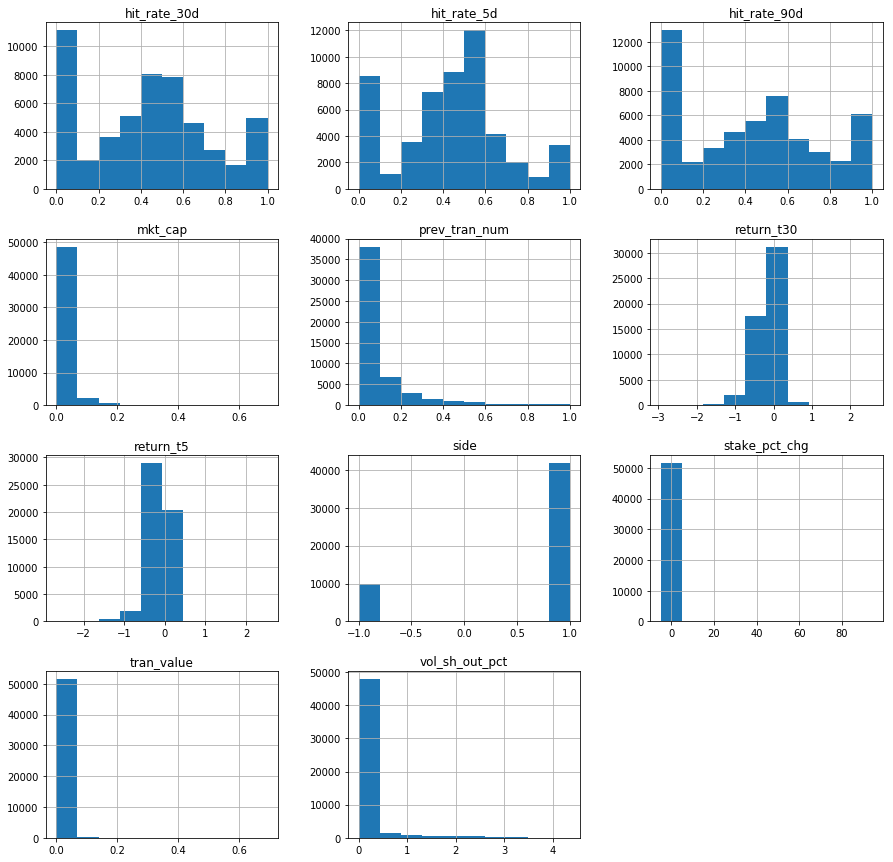

In [53]:
df[col_list].hist(figsize = [15,15])

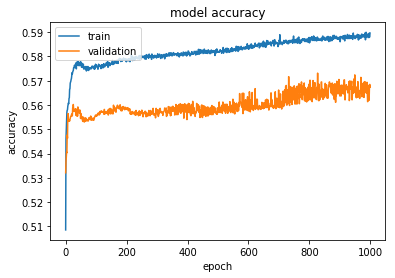

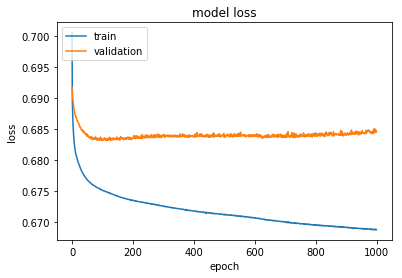

In [52]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [54]:
# evaluate the model
scores = model.evaluate(X_train, y_train_5d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_5d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 16us/step
[Train] acc: 58.37%
17240/17240 [==============================] - 0s 15us/step
[Test] acc: 57.06%
